In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('done')

done


In [2]:
data=pd.read_csv('heart.csv')

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.sample()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.replace('?',0,inplace=True)

In [7]:
X = data.drop('target',axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X_train,y_train)

DecisionTreeClassifier()

In [8]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [9]:
model.score(X_test,y_test)


0.8032786885245902

In [10]:
accuracy_score(y_test,y_pred)

0.8032786885245902

In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82        29
           1       0.92      0.69      0.79        32

    accuracy                           0.80        61
   macro avg       0.82      0.81      0.80        61
weighted avg       0.83      0.80      0.80        61



In [12]:
data.shape

(303, 14)

In [13]:
import pandas as pd
df = pd.read_csv('heart.csv')
male_count = (df['sex'] == 1).sum()
female_count = (df['sex'] == 0).sum()
print(f'Number of males: {male_count}')
print(f'Number of females: {female_count}')

Number of males: 207
Number of females: 96


In [14]:
df = pd.read_csv('heart.csv')
age_bins = [30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df['Age Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
age_group_counts = df['Age Group'].value_counts()
most_populous_age_group = age_group_counts.idxmax()
count_most_populous_age_group = age_group_counts.max()
print(f'Most populous age group: {most_populous_age_group} with {count_most_populous_age_group} patients')

Most populous age group: 50-59 with 125 patients


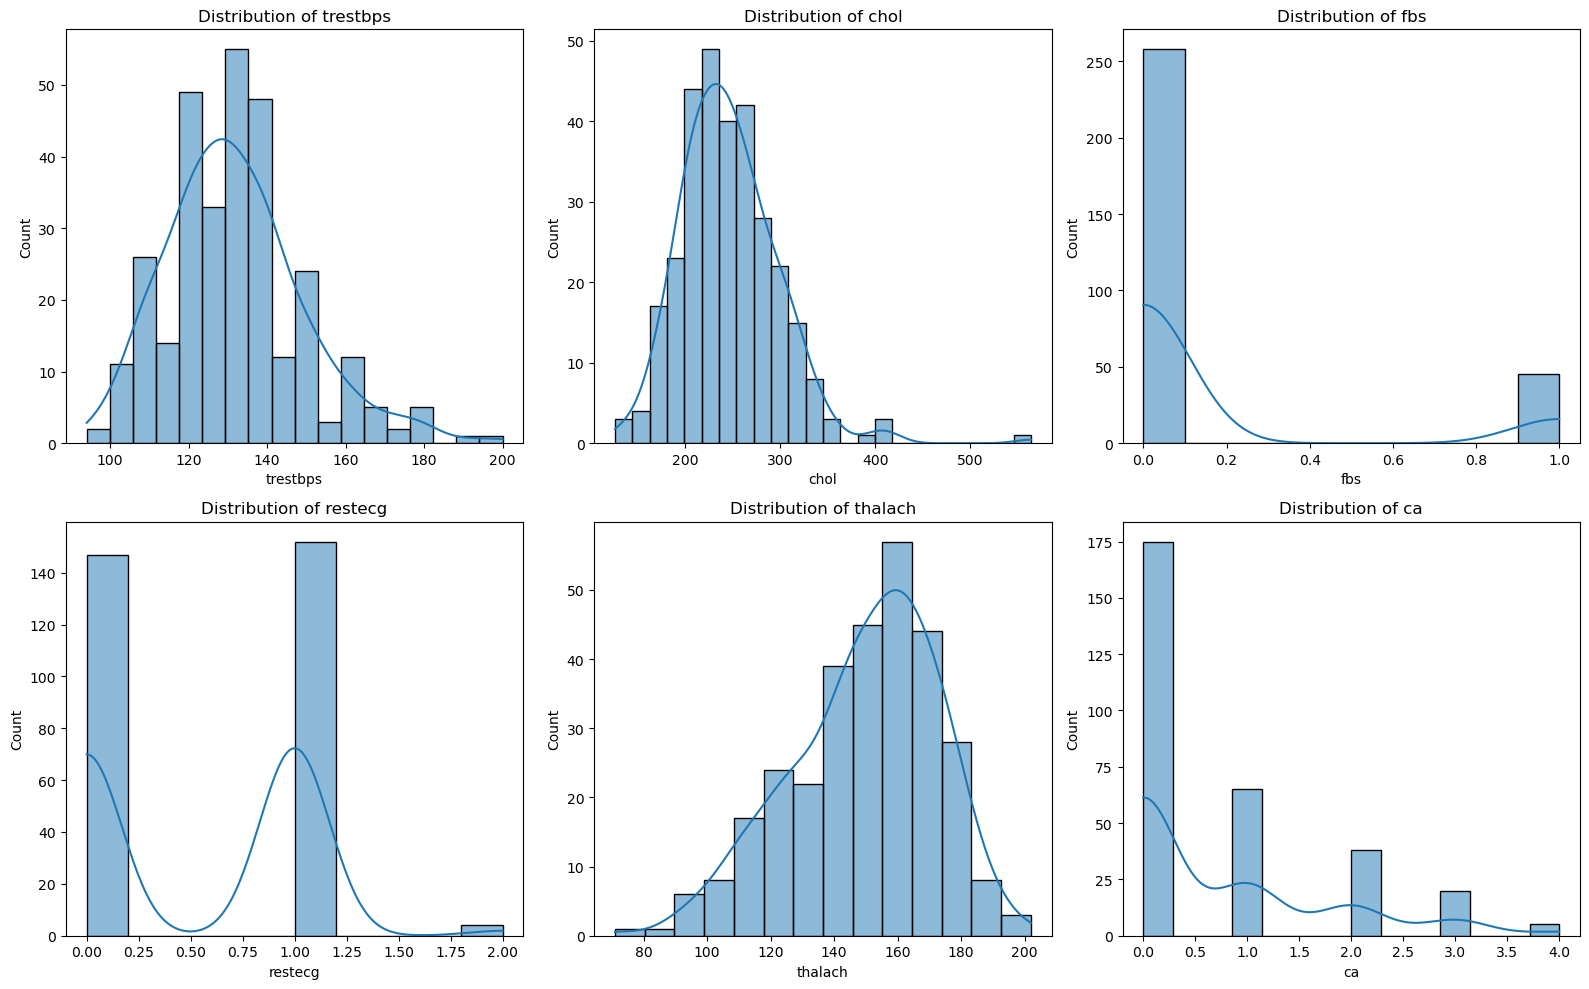

In [15]:
df = pd.read_csv('heart.csv')
columns_of_interest = ['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'ca']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
for i, column in enumerate(columns_of_interest):
    row = i // 3
    col = i % 3
    sns.histplot(df[column], ax=axes[row, col], kde=True)
    axes[row, col].set_title(f'Distribution of {column}')
plt.tight_layout()
plt.show()